In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # import the curve fitting function
%matplotlib inline

In [2]:
def myfun(p,a,b,c):
    ans = a + b*p + c*p**2  # this is y, "the function to be fit"
    return ans

In [3]:
xpoints = np.array([1865,1753,1554,1152,733,688,588,474,200]) #Peak Pixel Number
ypoints = np.array([728.13,706.52,667.81,587.57,501.57,492.19,471.31,447.14,386.86]) #Known corresponding wavelength

In [4]:
p0 = [345,.2,1e-6] #guess

In [5]:
xlots = np.linspace(150,2000)  # need lots of data points for smooth curve
yfit = np.zeros((len(xpoints),xlots.size))

plsq, pcov = curve_fit(myfun, xpoints, ypoints, p0)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
a = plsq[0]
ea = np.sqrt(pcov[0,0])
b = plsq[1]
eb = np.sqrt(pcov[1,1])
c = plsq[2]
ec = np.sqrt(pcov[2,2])

yfit = myfun(xlots,plsq[0],plsq[1],plsq[2])  # use fit results for a, b, c
    
print('a = %.7f +/- %.7f' % (plsq[0], np.sqrt(pcov[0,0])))
print('b = %.7f +/- %.7f' % (plsq[1], np.sqrt(pcov[1,1])))
print('c = %.7f +/- %.7f' % (plsq[2], np.sqrt(pcov[2,2])))

a = 343.1312858 +/- 0.4824674
b = 0.2225833 +/- 0.0011006
c = -0.0000087 +/- 0.0000005


In [6]:
a = 345.4 #From matlab
b = .2181
c = -6.914*1e-6

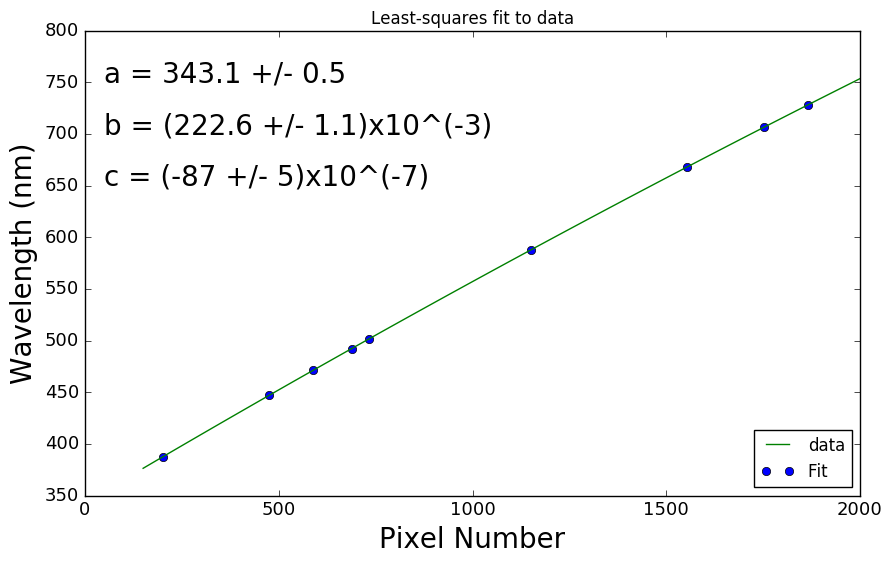

In [7]:
plt.figure(figsize=(10,6));
plt.errorbar(xpoints,ypoints,linestyle = '',marker = 'o');
plt.xlabel('x (mm)');
plt.ylabel('y (mm)');
plt.plot(xlots,yfit);
plt.title('Least-squares fit to data');
plt.legend(['data','Fit'],loc='lower right');
plt.text(50,750,'a = %.1f +/- %.1f' % (plsq[0], np.sqrt(pcov[0,0])),size=20)
plt.text(50,700,'b = (%.1f +/- %.1f)x10^(-3)' % (plsq[1]*1e3, np.sqrt(pcov[1,1])*1e3),size=20)
plt.text(50,650,'c = (%.0f +/- %.0f)x10^(-7)' % (plsq[2]*1e7, np.sqrt(pcov[2,2])*1e7),size=20)
plt.xlabel('Pixel Number',fontsize=20);
plt.ylabel('Wavelength (nm)',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.savefig('Sample')

In [8]:
myfun(1386,a,b,c)

634.404833656

In [9]:
myfun(1382,a,b,c)

633.608985464

In [10]:
#Linewidth from HeNe laser
myfun(1375,a,b,c) - myfun(1382,a,b,c)

-1.3932667140001058

In [11]:
#Hydrogen Comparisons
myfun(1495.5,a,b,c)

656.1052489914999

In [12]:
myfun(659,a,b,c)

486.125281166

In [13]:
myfun(412,a,b,c)

434.08358998399996

In [14]:
def I(y):
    return (y**(-5))*np.exp((-14.4*1e6)/(y*(2350+273)))

In [15]:
2350+273

2623

In [16]:
26.3/10.1

2.603960396039604

In [17]:
I(800)/I(600)

2.3374176413671881

In [18]:
I(600)/I(800)

0.42782256037696625

In [19]:
ypoints

array([ 728.13,  706.52,  667.81,  587.57,  501.57,  492.19,  471.31,
        447.14,  386.86])

In [20]:
y_calc = np.array([myfun(entry,plsq[0],plsq[1],plsq[2]) for entry in xpoints])
y_calc

array([ 727.92001831,  706.52405478,  667.96835845,  587.9752781 ,
        501.59983507,  492.14116869,  470.99547428,  446.67665667,
        387.29915566])

In [21]:
dev_sqr = np.array([(ypoints[i]-y_calc[i])**2 for i in np.arange(len(y_calc))])
dev_sqr

array([  4.40923111e-02,   1.64412277e-05,   2.50773978e-02,
         1.64250338e-01,   8.90131675e-04,   2.38449729e-03,
         9.89264278e-02,   2.14687040e-01,   1.92857696e-01])

In [22]:
dy = np.sqrt(np.mean(dev_sqr))
dy

0.28736006840571365

### Hydrogen Curve Fit

In [23]:
yH = np.array([656.1, 486.1, 434.1, 410.2, 396.9, 388.9, 383.5])*1e-9 #From pixels and wiki

In [24]:
def myfun2(x, C, m):
    ans = C*(1/m**2 - 1/x**2)  # this is y, "the function to be fit"
    return ans

In [25]:
xpoints2 = np.array([3,4,5,6,7,8,9]) #Peak Pixel Number
ypoints2 = np.array([1/entry for entry in yH]) #1/Known corresponding wavelength

In [26]:
p02 = np.array([2, 13.6/(1240*1e-9)]) #guess

In [27]:
xlots2 = np.linspace(3,50)  # need lots of data points for smooth curve
yfit2 = np.zeros((len(xpoints2),xlots2.size))

plsq, pcov = curve_fit(myfun2, xpoints2, ypoints2)  # curve fit returns p and covariance matrix
# these give the parameters and the uncertainties
C = plsq[0]
eC = np.sqrt(pcov[0,0])
m = plsq[1]
em = np.sqrt(pcov[1,1])

yfit2 = myfun2(xlots2,plsq[0],plsq[1])
    
print('C = %.7f +/- %.7f' % (plsq[0], np.sqrt(pcov[0,0])))
print('m = %.7f +/- %.7f' % (plsq[1], np.sqrt(pcov[1,1])))

C = 10969456.6806762 +/- 4167.5082663
m = -1.9998287 +/- 0.0003208


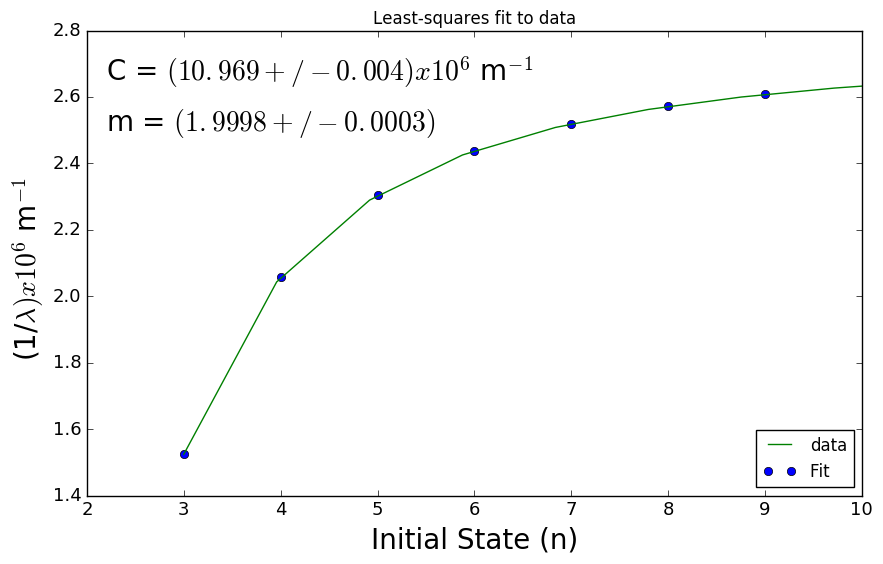

In [28]:
plt.figure(figsize=(10,6));
plt.errorbar(xpoints2,ypoints2/1e6,linestyle = '',marker = 'o');
plt.xlabel('');
plt.ylabel('y (mm)');
plt.plot(xlots2,yfit2/1e6);
plt.title('Least-squares fit to data');
plt.legend(['data','Fit'],loc='lower right');
plt.text(2.2,2.65,'C = $(%.3f +/- %.3f)x10^6$ m$^{-1}$' % (C/1e6, eC/1e6),size=20)
plt.text(2.2,2.50,'m = $(%.4f +/- %.4f)$' % (abs(m), em),size=20)
plt.xlabel('Initial State (n)',fontsize=20);
plt.ylabel('(1/$\lambda)x10^{6}$ m$^{-1}$  ',fontsize = 20);
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.xlim(2,10)
plt.savefig('Sample')

In [29]:
## Series limit
y_limit = 1/(C*1/4)
y_limit*1e9

364.64887153858712

### Irradiance

In [30]:
def ratio2to1(y1,y2,T):
    return (y2/y1)**(-5) *np.exp((-14.4e6/T)*(1/y2 - 1/y1)) #y in nm. T in K

In [31]:
ratio2to1(600,800,2623) #Here the measured ratio is 26.3/10.1 = 2.604

2.3374176413671872

In [32]:
3.1/.78

3.9743589743589745

In [33]:
ratio2to1(600,800,(1856+273)) #Here the measured ratio is 3.1/.78 = 3.97435

3.9741629856850214

So then the predicted filament temperature is 1856C, we measured 1880C from tool. 

In [34]:
myfun(755,a,b,c) - myfun(896,a,b,c)

-29.14258302600001

In [35]:
myfun(1340,a,b,c) - myfun(1418,a,b,c)

-15.524432664000074

In [36]:
myfun(490,a,b,c) - myfun(625,a,b,c)

-28.40277014999998

In [37]:
(13.6/1240)*1e3

10.96774193548387